In [1]:
import numpy as np
import dataset
import os
import tensorflow as tf

100%|██████████| 20/20 [00:04<00:00,  4.35it/s]
2023-06-24 09:39:26.953344: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
Images, labels = dataset.get_random_uniform(900)
Images = Images[..., np.newaxis]/255

100%|██████████| 20/20 [00:00<00:00, 659.23it/s]


In [3]:
model = tf.keras.models.load_model('./chks/SavedModel_1')

2023-06-24 09:39:29.974453: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
predictions = model.predict(Images)
predictions = np.argmax(predictions, axis=-1)
predictions.shape

563/563 [==============================] - 3s 4ms/step


(18000,)

In [5]:
count = (predictions==labels).sum()
accuracy = count/labels.size
print(accuracy)

0.9988888888888889


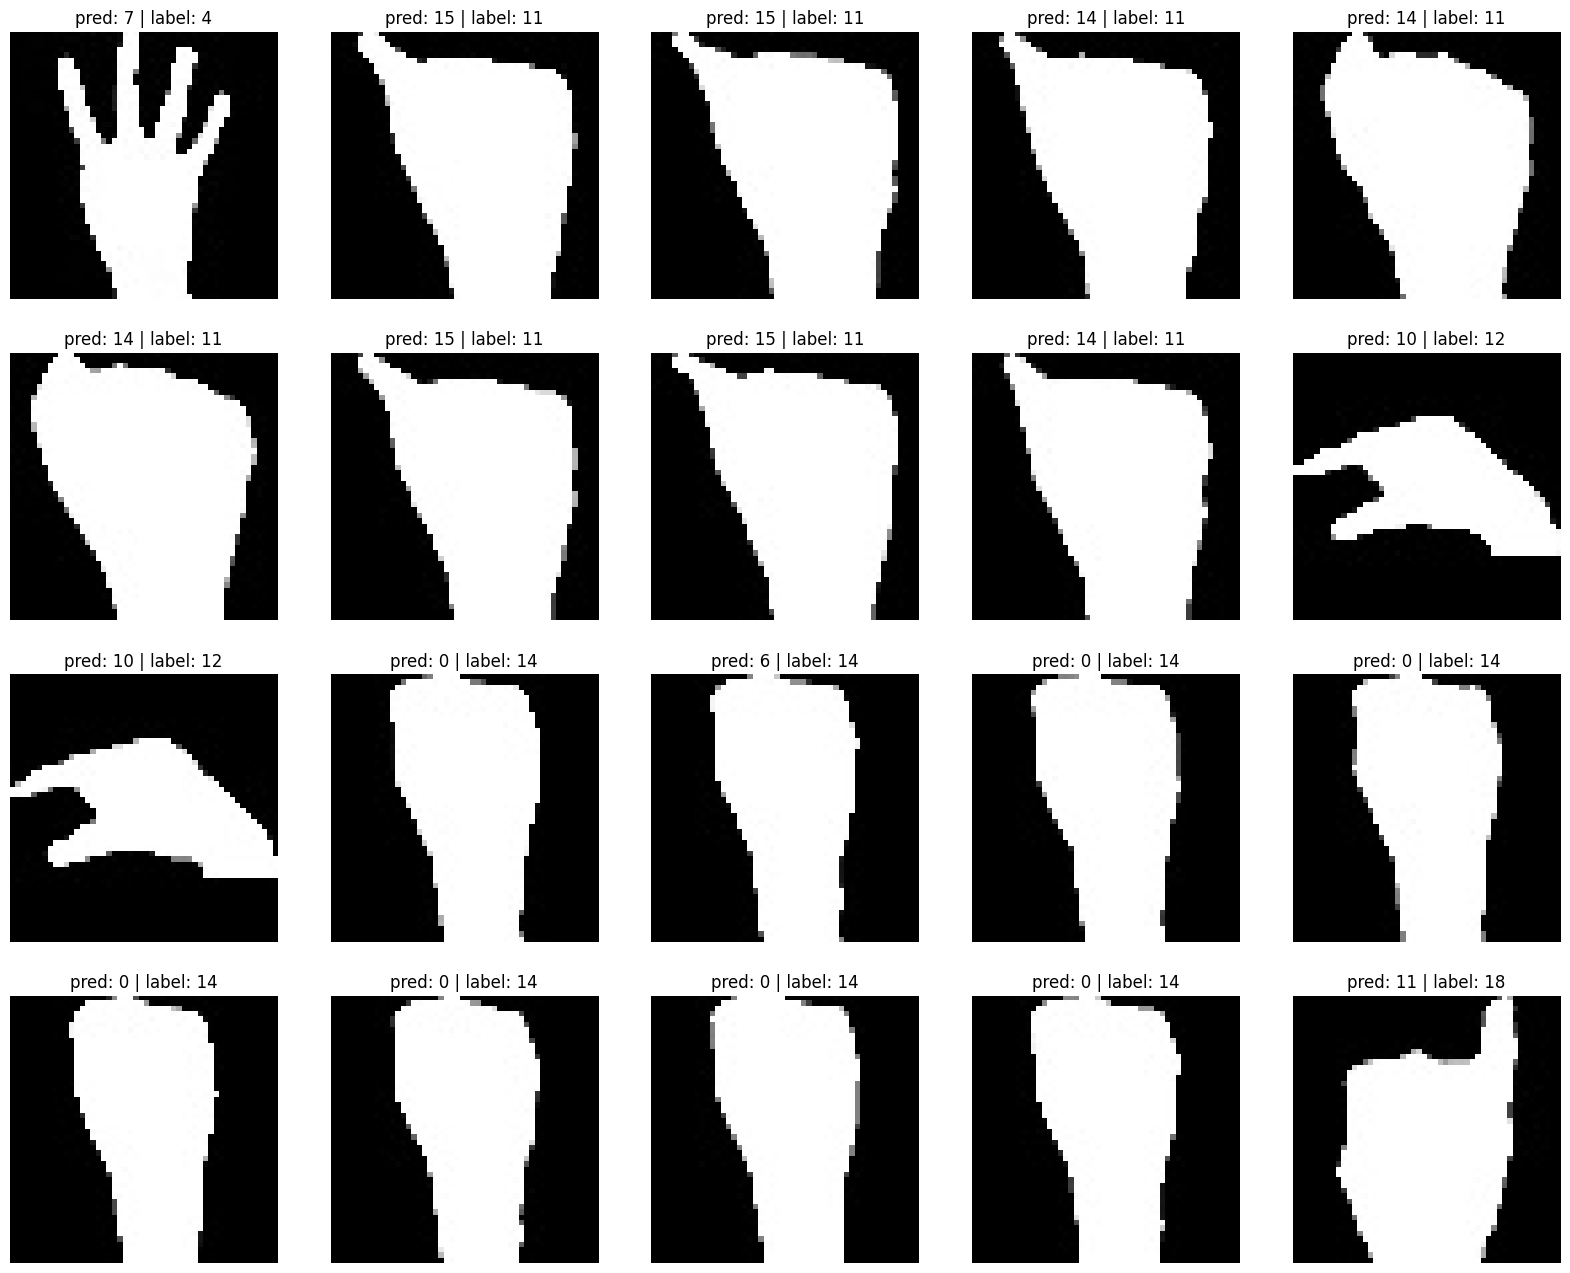

In [10]:
import matplotlib.pyplot as plt

wrong = predictions != labels
wrong_Images = Images[wrong]
fig, ax = plt.subplots(4, 5, figsize=(20, 16))
for i, img in enumerate(wrong_Images):
    x, y = i//5, i%5
    ax[x][y].imshow(img, cmap='gray')
    ax[x][y].axis('off')
    ax[x][y].set_title(f'pred: {predictions[wrong][i]} | label: {labels[wrong][i]}')
plt.show()
    